### Nihar Muniraju
#### DSC 478 Programming Machine Learning Applications
## Assignment 3

### Part A:[5 pts] Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
from sklearn.metrics import completeness_score, homogeneity_score
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics.cluster._supervised")

In [2]:
# Read the data
crime_data = pd.read_csv('N:/Programming machine learning/assignment3/communities/communities.csv', sep=',', na_values=['?'])

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", crime_data.shape)

Shape of the dataset: (1994, 100)


#### Impute missing values with the mean of the respective column


In [5]:
#Handling missing values by imputing those values based on the variable means for numeric columns
numeric_cols = crime_data.select_dtypes(include=[np.number]).columns
crime_data[numeric_cols] = crime_data[numeric_cols].fillna(crime_data[numeric_cols].mean())


#### Misising values

In [6]:
# Verify that there are no more missing values
missing_values = crime_data.isna().sum()
print("Missing values after imputation:", missing_values[missing_values > 0])

Missing values after imputation: Series([], dtype: int64)


#### Compute and display basic statistics for the dataset

In [7]:
# Compute and display basic statistics for the variables in the data set
print("Basic statistics for the variables:")
crime_data.describe().T

Basic statistics for the variables:


count       mean        std  min    25%    50%    75%  \
state                1994.0  28.683551  16.397553  1.0  12.00  34.00  42.00   
population           1994.0   0.057593   0.126906  0.0   0.01   0.02   0.05   
householdsize        1994.0   0.463395   0.163717  0.0   0.35   0.44   0.54   
racepctblack         1994.0   0.179629   0.253442  0.0   0.02   0.06   0.23   
racePctWhite         1994.0   0.753716   0.244039  0.0   0.63   0.85   0.94   
...                     ...        ...        ...  ...    ...    ...    ...   
PctSameState85       1994.0   0.651530   0.198221  0.0   0.56   0.70   0.79   
LandArea             1994.0   0.065231   0.109459  0.0   0.02   0.04   0.07   
PopDens              1994.0   0.232854   0.203092  0.0   0.10   0.17   0.28   
PctUsePubTrans       1994.0   0.161685   0.229055  0.0   0.02   0.07   0.19   
ViolentCrimesPerPop  1994.0   0.237979   0.232985  0.0   0.07   0.15   0.33   

                      max  
state                56.0  
population            1.0  
householdsize         1.0  
racepctblack          1.0  
racePctWhite          1.0  
...                   ...  
PctSameState85        1.0  
LandArea              1.0  
PopDens               1.0  
PctUsePubTrans        1.0  
ViolentCrimesPerPop   1.0  

[99 rows x 8 columns]

#### Separate the target variable 'ViolentCrimesPerPop' from the features

In [8]:
#Separate the target attribute for regression from the rest of the attributes of the data set
vs_target = crime_data['ViolentCrimesPerPop']
crime_data.drop(columns=['ViolentCrimesPerPop', 'communityname', 'state'], inplace=True)

In [9]:
# Convert the original data set and the response variable into numpy arrays
X = crime_data.to_numpy()
y = vs_target.to_numpy()
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1994, 97)
Shape of y: (1994,)


In [10]:
#Extract the feature names
feature_names = crime_data.columns.values
print("Feature names:", feature_names)

Feature names: ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par'
 'PctTeen2Par' 'PctWorkMomYoungKids' 'PctWorkMom' 'NumIlleg' 'PctIlleg'
 'NumImmig' 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10'
 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous'
 'PersPerRentOccHous

In [11]:
# Ensure all arrays are of the same length
if X.shape[0] == y.shape[0]:
    print("All arrays are of the same length.")
else:
    print("Arrays are not of the same length.")

All arrays are of the same length.


#### Split the data into training and testing sets (80% training, 20% testing)

In [12]:
# Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1595, 97)
Shape of X_test: (399, 97)
Shape of y_train: (1595,)
Shape of y_test: (399,)


In [14]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.01           0.54          0.02          0.91          0.27   
1        0.99           0.42          0.59          0.44          0.11   
2        0.01           0.53          0.02          0.95          0.15   
3        0.07           0.41          0.02          0.97          0.05   
4        0.05           0.41          0.11          0.85          0.23   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.04         0.37         0.41         0.25        0.28  ...   
1         0.11         0.44         0.56         0.37        0.39  ...   
2         0.03         0.27         0.37         0.18        0.23  ...   
3         0.02         0.32         0.49         0.31        0.44  ...   
4         0.03         0.32         0.52         0.26        0.10  ...   

   NumInShelters  NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  \
0           0.01       0.00            0.29              0.42            0.72   
1           0.30       0.12            0.14              0.71            0.52   
2           0.01       0.00            0.17              0.54            0.38   
3           0.00       0.00            0.13              0.88            0.76   
4           0.00       0.00            0.17              0.33            0.20   

   PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  
0           0.74            0.62      0.01     0.20            0.47  
1           0.79            0.75      0.28     0.55            0.62  
2           0.24            0.51      0.11     0.03            0.09  
3           0.74            0.84      0.05     0.27            0.40  
4           0.23            0.05      0.09     0.12            0.01  

[5 rows x 97 columns]

### PART B:[10 pts] Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
# Display the regression coefficients
print("Regression coefficients:", lm.coef_)

Regression coefficients: [-7.52656629e-03 -5.28396680e-02  2.21547570e-01 -5.03199162e-02
 -1.96010315e-02  4.76949814e-02  1.02285177e-01 -1.69896511e-01
 -1.26211473e-01  7.14204649e-02 -1.25853261e-01  3.87986180e-02
 -2.01918099e-01 -2.13121910e-01  4.21246697e-02 -7.44445905e-02
  1.24852413e-02  2.25201184e-02 -9.58013048e-02  3.53979558e-01
  7.57326633e-02 -3.52089855e-01 -2.93676330e-02 -4.15893659e-02
  3.33220798e-02  4.71028688e-02  3.89021825e-02  2.97770808e-01
 -2.38551315e-01 -8.53275102e-03 -4.53960097e-02  7.67420267e-02
  1.56572032e-02  2.25051684e-01 -4.97873716e-02 -3.91366512e-02
  3.46194760e-01  2.11727329e-01  7.54492064e-02 -3.59121087e-01
 -1.58937159e-01 -1.73716203e-02 -2.60253644e-01 -4.63158082e-02
 -9.00374174e-03  8.91193223e-03 -1.57889829e-01 -2.66670112e-01
  1.43290159e-01 -1.18798830e-01  8.40395513e-03  4.89371965e-02
 -1.88835442e-01  1.36372557e-01 -3.22691120e-02 -2.44000729e-01
  6.40813099e-01 -3.81532245e-01 -3.50231164e-04 -1.47935514e-01


In [17]:
len(feature_names)

97

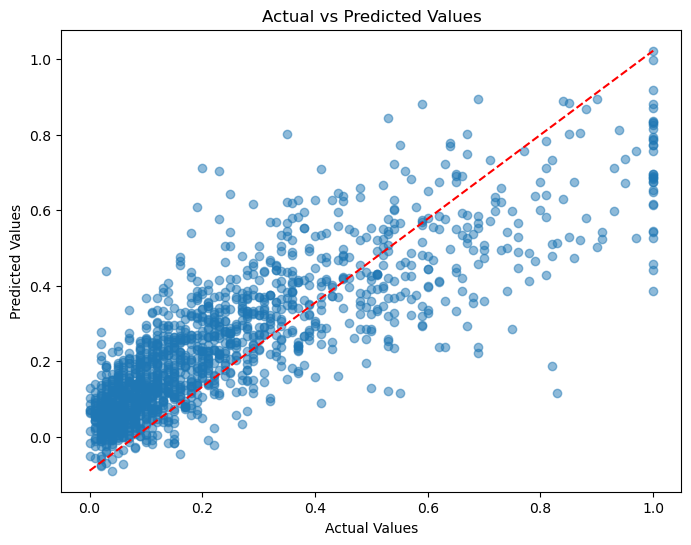

In [18]:
# Predict on the training set
y_train_pred = lm.predict(X_train)

# Plot the correlation between the predicted and actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


The Top 5 important features:
             Feature  Coefficient
71     PctHousOwnOcc     0.651521
56      PctRecImmig8     0.640813
62  PersPerOccupHous     0.573000
83           MedRent     0.385570
19         medFamInc     0.353980

The last 5 less important features:
            Feature  Coefficient
47         NumIlleg    -0.266670
21      whitePerCap    -0.352090
39      TotalPctDiv    -0.359121
57    PctRecImmig10    -0.381532
65  PctPersOwnOccup    -0.733036


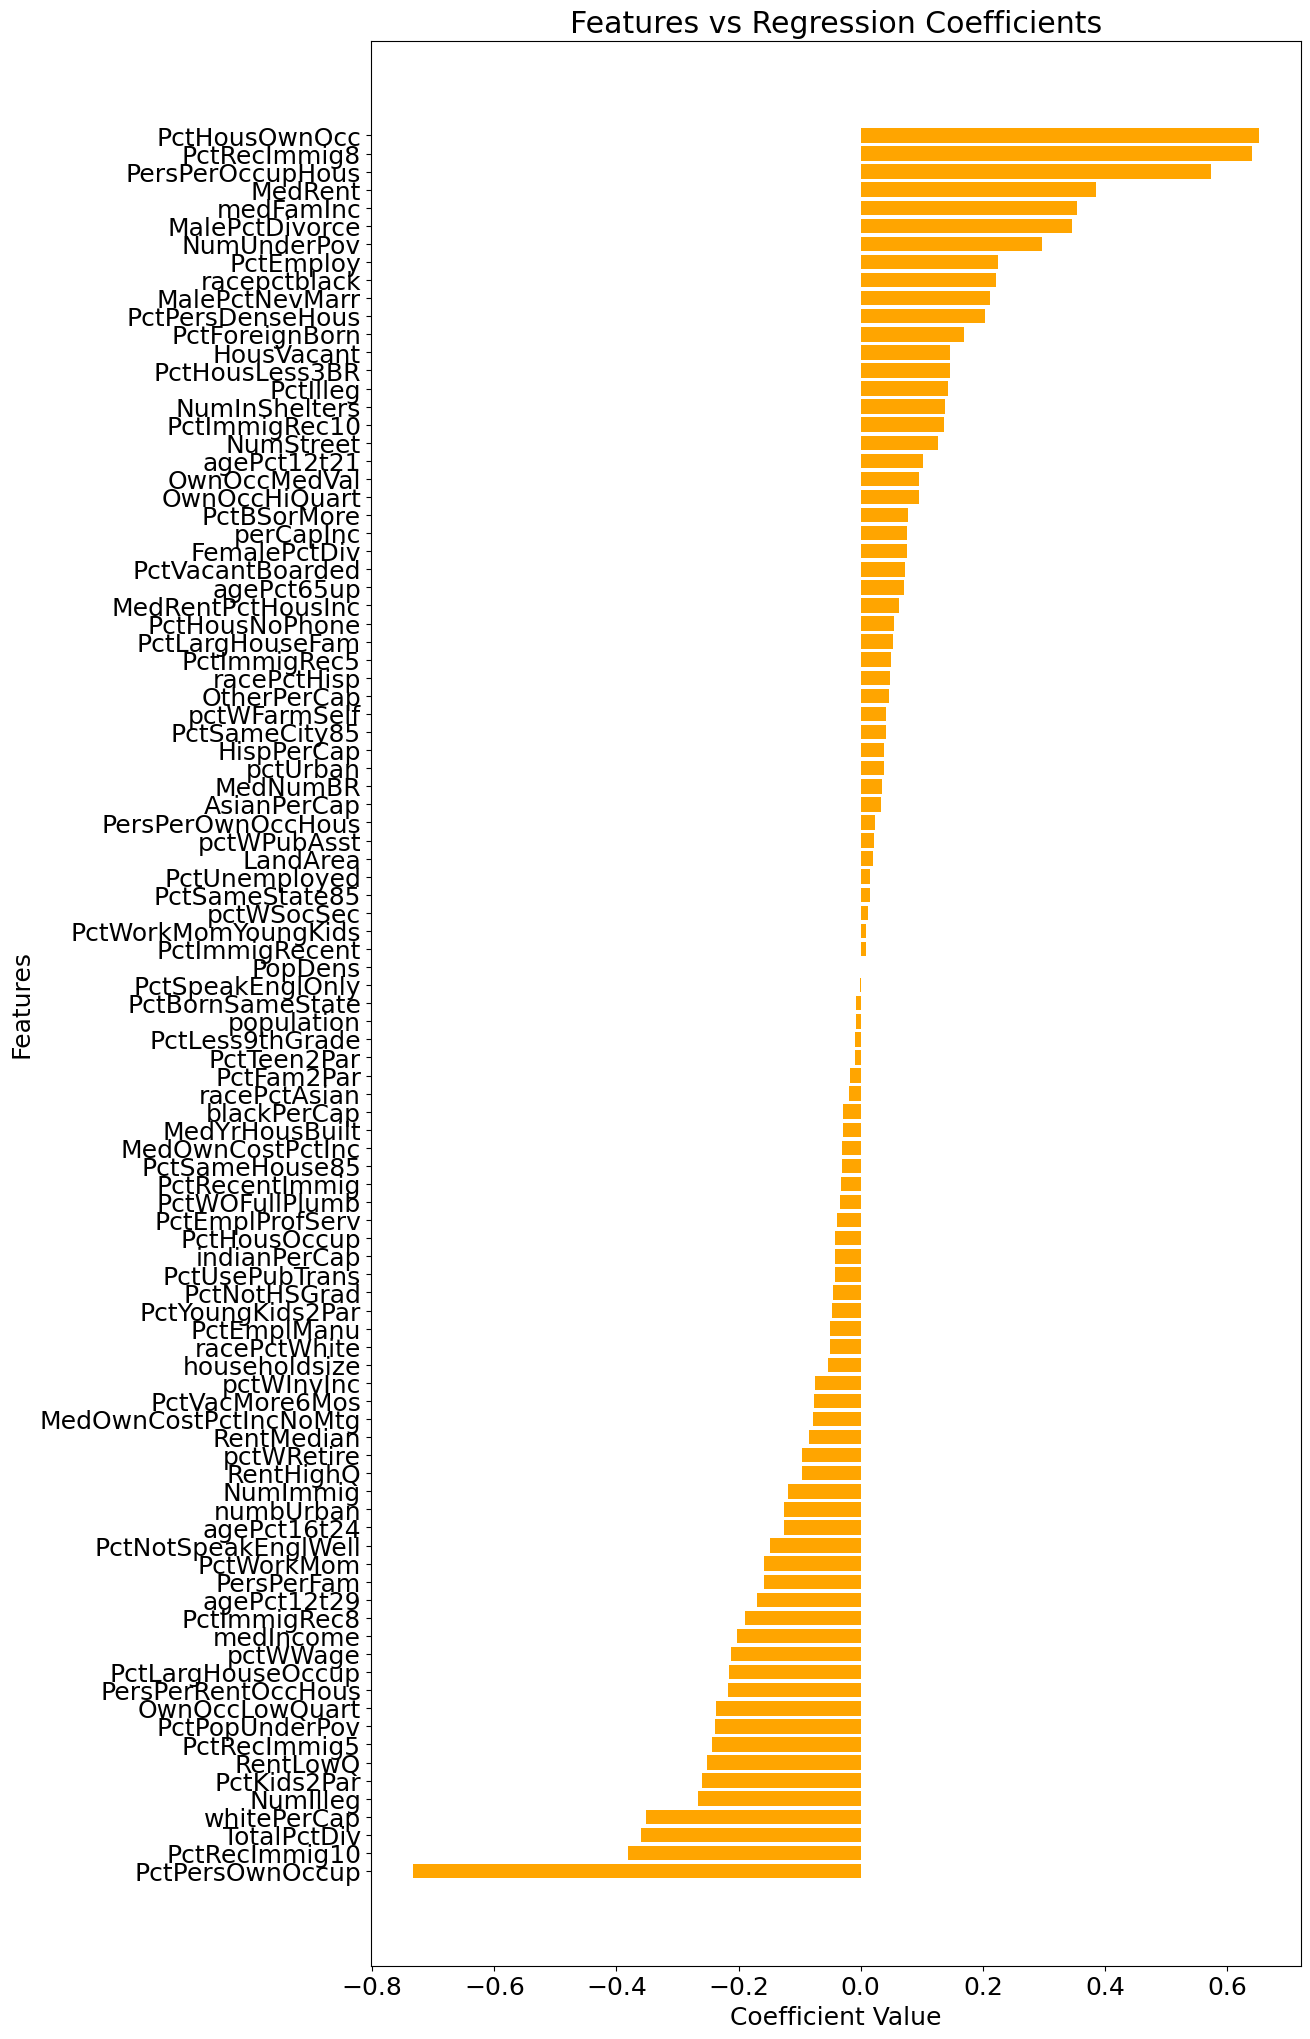

In [19]:
def plot_coefficients(model, n_features, feature_names):
    plt.rcParams.update({'font.size': 18})  

    coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
    coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

    print('The Top 5 important features:')
    print(coefficients.head(5))
    print('\nThe last 5 less important features:')
    print(coefficients.tail(5))

    plt.figure(figsize=(12, 25))
    plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='orange')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Features vs Regression Coefficients')
    plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficient on top
    plt.show()


plot_coefficients(lm, len(feature_names), feature_names)

In [20]:
n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
xval_err = 0

for train_index, test_index in kf.split(X_train):
    
    lm.fit(X_train[train_index], y_train[train_index])
    
    p = lm.predict(X_train[test_index])

    e = p - y_train[test_index]
    
    xval_err += np.sqrt(np.dot(e, e) / len(X_train[test_index]))
       
#the average RMSE cross-validation score by dividing by n
rmse_10cv = xval_err / n

# Predict on the training set
y_train_pred = lm.predict(X_train)

# Calculate the RMSE on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Print the results
method_name = 'Simple Linear Regression'
print('Method:', method_name)
print('RMSE on training: %.4f' % rmse_train)
print('RMSE on 10-fold CV: %.4f' % rmse_10cv)


Method: Simple Linear Regression
RMSE on training: 0.1267
RMSE on 10-fold CV: 0.1343


#### PART C.[15 pts] Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.

[Note: For an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.]


In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
# Feature selection
percentiles = range(1, 101, 5)
results = []

for i in percentiles:
    fs = SelectPercentile(f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = -cross_val_score(lm, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"Percentile: {i}, Mean Absolute Error: {scores.mean()}")
    results.append(scores.mean())

optimal_percentile = np.argmin(results)
optimal_num_features = int(percentiles[optimal_percentile] * X_train.shape[1] / 100)
print(f"Optimal percentile: {percentiles[optimal_percentile]}")
print(f"Number of features: {optimal_num_features}")

Percentile: 1, Mean Absolute Error: 0.11287401163402822
Percentile: 6, Mean Absolute Error: 0.09943268475677308
Percentile: 11, Mean Absolute Error: 0.09900510519125442
Percentile: 16, Mean Absolute Error: 0.0990905907952681
Percentile: 21, Mean Absolute Error: 0.09750686221310859
Percentile: 26, Mean Absolute Error: 0.09608904536542377
Percentile: 31, Mean Absolute Error: 0.09478480270197638
Percentile: 36, Mean Absolute Error: 0.09474955355002232
Percentile: 41, Mean Absolute Error: 0.09435370428857698
Percentile: 46, Mean Absolute Error: 0.09466441760571027
Percentile: 51, Mean Absolute Error: 0.09498773346781053
Percentile: 56, Mean Absolute Error: 0.0953208516480594
Percentile: 61, Mean Absolute Error: 0.09574966889254498
Percentile: 66, Mean Absolute Error: 0.09572089544915725
Percentile: 71, Mean Absolute Error: 0.09583132229767206
Percentile: 76, Mean Absolute Error: 0.09519157369784723
Percentile: 81, Mean Absolute Error: 0.09542568827536392
Percentile: 86, Mean Absolute Error

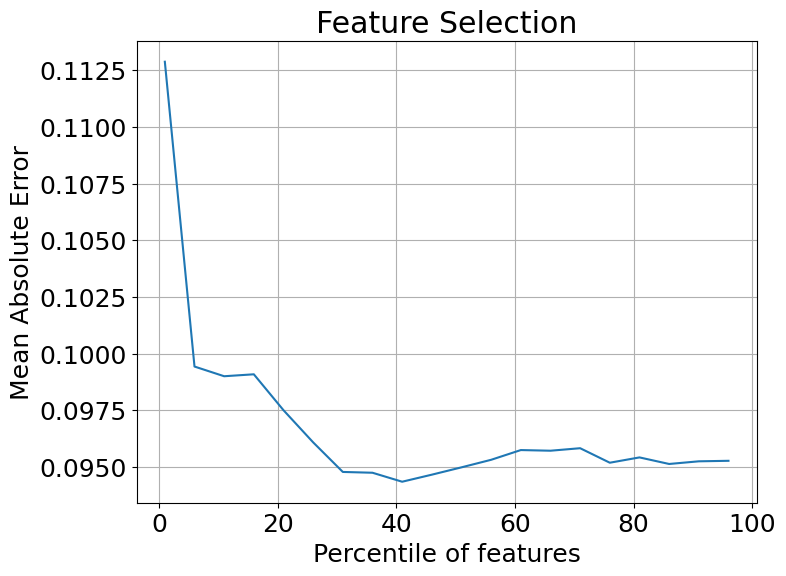

In [23]:
# Plotting the performance
plt.figure(figsize=(8, 6))
plt.plot(percentiles, results)
plt.xlabel('Percentile of features')
plt.ylabel('Mean Absolute Error')
plt.title('Feature Selection')
plt.grid(True)
plt.show()

In [24]:
# Selecting the best features
fs = SelectPercentile(f_regression, percentile=percentiles[optimal_percentile])
X_train_best = fs.fit_transform(X_train, y_train)
X_test_best = fs.transform(X_test)

In [25]:
# Train and evaluate the model with the selected features
lm.fit(X_train_best, y_train)
y_pred = lm.predict(X_test_best)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error with selected features: {mae}")

Mean Absolute Error with selected features: 0.10127083211050729


In [26]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)

[ True False  True  True False False False False False False  True False  True
  True False  True False  True False  True  True False False False False False
 False  True  True  True  True  True  True  True False False  True False  True
  True False  True  True  True  True False False  True  True False False False
 False False False False False False False False  True False False False False
  True  True  True  True  True  True  True  True False False  True  True False
 False False False False False False  True False False  True  True False False
 False False False False False False]
[ 256.03    3.49 1074.89 1412.51    1.96  137.54    4.89   37.33   15.88
    8.25  247.78   11.06  341.63  161.57   40.34  756.01   22.49  784.57
   13.98  366.9   214.99   65.45  126.58   12.32   29.07   33.37   92.37
  400.31  578.82  319.22  472.2   173.37  533.91  190.47    2.61    7.4
  602.77  161.08  704.77  693.14   24.47 1657.87 1972.8  1342.17 1299.54
    1.31   36.5   431.64 1936.12  151.62   40

In [27]:
selected_support = fs.get_support()
selected_scores = fs.scores_

print("Feature \t Score")
for i in range(len(feature_names)):
    if selected_support[i]:
        print(f"{feature_names[i]} \t {selected_scores[i]:.4f}")

Feature 	 Score
population 	 256.0324
racepctblack 	 1074.8895
racePctWhite 	 1412.5078
numbUrban 	 247.7761
medIncome 	 341.6325
pctWWage 	 161.5708
pctWInvInc 	 756.0150
pctWPubAsst 	 784.5706
medFamInc 	 366.9004
perCapInc 	 214.9932
NumUnderPov 	 400.3079
PctPopUnderPov 	 578.8174
PctLess9thGrade 	 319.2181
PctNotHSGrad 	 472.1962
PctBSorMore 	 173.3668
PctUnemployed 	 533.9132
PctEmploy 	 190.4653
MalePctDivorce 	 602.7749
FemalePctDiv 	 704.7727
TotalPctDiv 	 693.1378
PctFam2Par 	 1657.8650
PctKids2Par 	 1972.8041
PctYoungKids2Par 	 1342.1736
PctTeen2Par 	 1299.5351
NumIlleg 	 431.6356
PctIlleg 	 1936.1209
PctLargHouseFam 	 241.2338
PctPersOwnOccup 	 630.7603
PctPersDenseHous 	 375.6459
PctHousLess3BR 	 487.9617
MedNumBR 	 242.0664
HousVacant 	 339.9686
PctHousOccup 	 173.7394
PctHousOwnOcc 	 478.5304
PctVacantBoarded 	 507.6364
PctHousNoPhone 	 505.8627
PctWOFullPlumb 	 209.1149
MedRentPctHousInc 	 178.6842
NumInShelters 	 265.8459
NumStreet 	 169.5343


#### Part D[10 pts] Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]

In [28]:
def calculate_parameters(X, y, model, param_values, param_name, K):
    print('{} Regression:'.format(type(model).__name__))
    print(param_name + '  RMSE_train\t RMSE_cv\n')
    
    t_rmse = np.array([])
    cv_rmse = np.array([])
    
    for param_value in param_values:
        model.set_params(**{param_name: param_value})
        model.fit(X, y)

        # Training RMSE
        p_train = model.predict(X)
        rmse_train = np.sqrt(mean_squared_error(y, p_train))
        t_rmse = np.append(t_rmse, [rmse_train])

        # Cross-validation RMSE
        kf = KFold(n_splits=K, shuffle=True, random_state=33)
        xval_err = 0
        for train_index, test_index in kf.split(X):
            model.fit(X[train_index], y[train_index])
            p = model.predict(X[test_index])
            e = p - y[test_index]
            xval_err += np.dot(e, e)
        rmse_cv = np.sqrt(xval_err / len(X))
        cv_rmse = np.append(cv_rmse, [rmse_cv])

        # Print the current parameter value and its corresponding RMSEs
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(param_value, rmse_train, rmse_cv))

    # Identify and print the optimal alpha value
    min_err_idx = np.argmin(cv_rmse)
    min_err_alpha = param_values[min_err_idx]
    print('\nThe minimum error using cross validation is: {:.4f} with {} : {:.4f}'.format(cv_rmse[min_err_idx], param_name, min_err_alpha))

    # Plotting
    plt.figure()
    plt.plot(param_values, t_rmse, label='RMSE-Train')
    plt.plot(param_values, cv_rmse, label='RMSE-CV')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    return t_rmse, cv_rmse

Ridge Regression:
alpha  RMSE_train	 RMSE_cv

0.010	 0.1262		 0.1359
0.214	 0.1265		 0.1349
0.418	 0.1268		 0.1346
0.622	 0.1271		 0.1345
0.826	 0.1273		 0.1344
1.029	 0.1274		 0.1343
1.233	 0.1276		 0.1343
1.437	 0.1278		 0.1343
1.641	 0.1279		 0.1342
1.845	 0.1280		 0.1342
2.049	 0.1281		 0.1342
2.253	 0.1283		 0.1342
2.457	 0.1284		 0.1342
2.660	 0.1285		 0.1342
2.864	 0.1286		 0.1342
3.068	 0.1287		 0.1342
3.272	 0.1288		 0.1342
3.476	 0.1288		 0.1342
3.680	 0.1289		 0.1343
3.884	 0.1290		 0.1343
4.088	 0.1291		 0.1343
4.291	 0.1292		 0.1343
4.495	 0.1292		 0.1343
4.699	 0.1293		 0.1343
4.903	 0.1294		 0.1343
5.107	 0.1294		 0.1343
5.311	 0.1295		 0.1343
5.515	 0.1296		 0.1344
5.719	 0.1296		 0.1344
5.922	 0.1297		 0.1344
6.126	 0.1297		 0.1344
6.330	 0.1298		 0.1344
6.534	 0.1298		 0.1344
6.738	 0.1299		 0.1344
6.942	 0.1299		 0.1344
7.146	 0.1300		 0.1344
7.350	 0.1300		 0.1345
7.553	 0.1301		 0.1345
7.757	 0.1301		 0.1345
7.961	 0.1302		 0.1345
8.165	 0.1302		 0.1345
8.369	 0.13

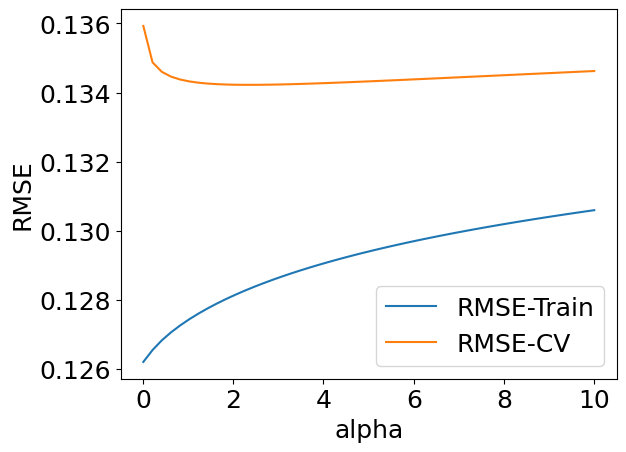

Optimal alpha for Ridge Regression: 2.2526530612244895


In [29]:
ridge = Ridge()
alphas = np.linspace(0.01, 10, 50)
train_rmse, cv_rmse = calculate_parameters(X_train, y_train, ridge, alphas, 'alpha', 5)

optimal_alpha_ridge = alphas[np.argmin(cv_rmse)]
print(f"Optimal alpha for Ridge Regression: {optimal_alpha_ridge}")

Lasso Regression:
alpha  RMSE_train	 RMSE_cv

0.000	 0.1282		 0.1347
0.021	 0.1760		 0.1763
0.041	 0.2312		 0.2312
0.061	 0.2312		 0.2312
0.082	 0.2312		 0.2312
0.102	 0.2312		 0.2312
0.123	 0.2312		 0.2312
0.143	 0.2312		 0.2312
0.163	 0.2312		 0.2312
0.184	 0.2312		 0.2312
0.204	 0.2312		 0.2312
0.225	 0.2312		 0.2312
0.245	 0.2312		 0.2312
0.265	 0.2312		 0.2312
0.286	 0.2312		 0.2312
0.306	 0.2312		 0.2312
0.327	 0.2312		 0.2312
0.347	 0.2312		 0.2312
0.367	 0.2312		 0.2312
0.388	 0.2312		 0.2312
0.408	 0.2312		 0.2312
0.429	 0.2312		 0.2312
0.449	 0.2312		 0.2312
0.469	 0.2312		 0.2312
0.490	 0.2312		 0.2312
0.510	 0.2312		 0.2312
0.531	 0.2312		 0.2312
0.551	 0.2312		 0.2312
0.571	 0.2312		 0.2312
0.592	 0.2312		 0.2312
0.612	 0.2312		 0.2312
0.633	 0.2312		 0.2312
0.653	 0.2312		 0.2312
0.674	 0.2312		 0.2312
0.694	 0.2312		 0.2312
0.714	 0.2312		 0.2312
0.735	 0.2312		 0.2312
0.755	 0.2312		 0.2312
0.776	 0.2312		 0.2312
0.796	 0.2312		 0.2312
0.816	 0.2312		 0.2312
0.837	 0.23

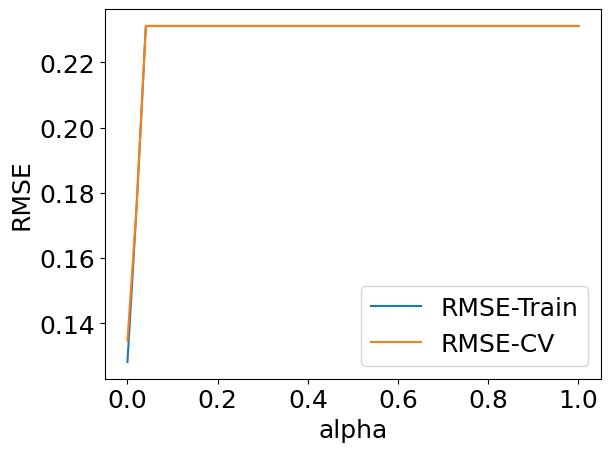

Optimal alpha for Lasso Regression: 0.0001


In [30]:
lasso = Lasso(max_iter=10000)
alphas = np.linspace(0.0001, 1, 50)
train_rmse, cv_rmse = calculate_parameters(X_train, y_train, lasso, alphas, 'alpha', 5)

optimal_alpha_lasso = alphas[np.argmin(cv_rmse)]
print(f"Optimal alpha for Lasso Regression: {optimal_alpha_lasso}")

Ridge Regression

The optimal alpha value for Ridge regression is found to be approximately 2.25.
This suggests that some amount of regularization is beneficial for this dataset, as the optimal alpha is greater than 0.
The RMSE for both training and cross-validation is relatively low, indicating that the Ridge regression model is fitting the data well without overfitting.

Lasso Regression

The optimal alpha value for Lasso regression is found to be 0.0001, which is very close to zero.
This indicates that Lasso regression is not applying much regularization to this dataset. In other words, the model is behaving similarly to a standard linear regression model.
The RMSE values for Lasso regression are also relatively low, similar to those of Ridge regression.

Conclusion

Both Ridge and Lasso regression models are performing well on this dataset, with low RMSE values for training and cross-validation.
The optimal alpha value for Ridge regression suggests that some regularization is beneficial, while the optimal alpha value for Lasso regression indicates that regularization is not significantly improving the model's performance.
This might suggest that the dataset does not have high multicollinearity or that the features are all relevant to the target variable. In such cases, regularization might not provide a significant improvement over standard linear regression.

### PART E: [10 pts] Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
param_grid = {
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=33)
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'alpha': 0.001, 'penalty': 'l1'}


In [33]:
sgd_best = SGDRegressor(**best_params, max_iter=1000, tol=1e-3, random_state=33)
sgd_best.fit(X_train_scaled, y_train)

# Training RMSE
p_train_sgd = sgd_best.predict(X_train_scaled)
rmse_train_sgd = np.sqrt(mean_squared_error(y_train, p_train_sgd))
print(f"RMSE for SGDRegressor on training set: {rmse_train_sgd}")

# Test RMSE
p_test_sgd = sgd_best.predict(X_test_scaled)
rmse_test_sgd = np.sqrt(mean_squared_error(y_test, p_test_sgd))
print(f"RMSE for SGDRegressor on test set: {rmse_test_sgd}")


RMSE for SGDRegressor on training set: 0.13199069423798254
RMSE for SGDRegressor on test set: 0.1468338635144639


In [34]:
param_grid_elasticnet = {
    'penalty': ['elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': np.linspace(0, 1, 10)
}

sgd_elasticnet = SGDRegressor(max_iter=1000, tol=1e-3, random_state=33)
grid_search_elasticnet = GridSearchCV(sgd_elasticnet, param_grid_elasticnet, cv=5, scoring='neg_root_mean_squared_error')
grid_search_elasticnet.fit(X_train_scaled, y_train)

best_params_elasticnet = grid_search_elasticnet.best_params_
print(f"Best parameters for Elastic Net: {best_params_elasticnet}")

Best parameters for Elastic Net: {'alpha': 0.01, 'l1_ratio': 0.3333333333333333, 'penalty': 'elasticnet'}


In [35]:
sgd_elasticnet_best = SGDRegressor(**best_params_elasticnet, max_iter=1000, tol=1e-3, random_state=33)
sgd_elasticnet_best.fit(X_train_scaled, y_train)

# Training RMSE
p_train_elasticnet = sgd_elasticnet_best.predict(X_train_scaled)
rmse_train_elasticnet = np.sqrt(mean_squared_error(y_train, p_train_elasticnet))
print(f"RMSE for Elastic Net SGDRegressor on training set: {rmse_train_elasticnet}")

# Test RMSE
p_test_elasticnet = sgd_elasticnet_best.predict(X_test_scaled)
rmse_test_elasticnet = np.sqrt(mean_squared_error(y_test, p_test_elasticnet))
print(f"RMSE for Elastic Net SGDRegressor on test set: {rmse_test_elasticnet}")

RMSE for Elastic Net SGDRegressor on training set: 0.13309768382002807
RMSE for Elastic Net SGDRegressor on test set: 0.14589704444508042


## 2.	Automatic Document Clustering [Dataset]

2.	Automatic Document Clustering [Dataset: newsgroups5.zip]
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.
Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). Do not use the KMeans clustering function in scikit-learn. You may use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]


PART A:[5 pts] Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.

In [36]:
data_matrix = pd.read_csv('N:/Programming machine learning/assignment3/communities/newsgroups5/matrix.txt', sep=',', header=None).values
data_terms = pd.read_csv('N:/Programming machine learning/assignment3/communities/newsgroups5/terms.txt', sep=',', header=None).values
data_classes = pd.read_csv('N:/Programming machine learning/assignment3/communities/newsgroups5/classes.txt', sep=',', header=None).values

In [37]:
def cosine_similarity_distance(vector1, vector2):
    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the L2 (Euclidean) norms of both vectors
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    # Calculate the Cosine similarity
    cosine_similarity = dot_product / (norm_vector1 * norm_vector2)

    # Convert the similarity to distance (inverse of similarity)
    distance = 1 - cosine_similarity

    return distance

In [38]:
vector1 = np.array([0.2, 0.8, 0.5, 0.1])  
vector2 = np.array([0.5, 0.2, 0.7, 0.3])  
distance = cosine_similarity_distance(vector1, vector2)
print(f"Distance between vector1 and vector2: {distance}")

Distance between vector1 and vector2: 0.2922882260402736


PART B:[10 pts] Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [39]:
# Take the transpose to make it a document x term matrix
data_matrix = data_matrix.T
data_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Split the data: Use the train_test_split function from scikit-learn to split the data into training (80%) and testing (20%) sets

In [40]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(data_matrix, test_size=0.2, random_state=99)

Transform the data using TFxIDF. If you have a function for this transformation, you can apply it to the training and testing sets

In [41]:
# Create a TfidfTransformer object
transformer = TfidfTransformer()

# Fit and transform the training data
X_train_tfidf = transformer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = transformer.transform(X_test)

PART C:[20 pts] Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

Important Note: for this problem you should try several values of k for the number of clusters (try values of k from 4 through 8) and in each case try several runs in order to obtain clusters that seem more meaningful. In some cases, you may find some small clusters containing noise documents, which is not unusual. The point is to experiment with different runs and cluster numbers until you find at least several clusters that seem to capture some of the key topics in the documents. You do not need to provide the results of all your runs; you should only provide the results of your best clustering along with a brief discussion of your experimentation and your final observations.
 

In [42]:
kmeans = KMeans(n_clusters=5, random_state=99)
kmeans.fit(X_train_tfidf)
labels = kmeans.labels_

In [43]:
def display_top_terms_per_cluster(features, centroids, labels, n_terms=10):
    for cluster_num in range(centroids.shape[0]):
        print(f"Cluster {cluster_num} size= {sum(labels == cluster_num)}")
        print("-" * 40)
        print(f"{'':<15}{'Freq':<10}{'DF':<10}% of Docs")
        centroid = centroids[cluster_num]
        sorted_indices = centroid.argsort()[::-1][:n_terms]
        for index in sorted_indices:
            term = features[index]
            # Calculate DF value for the term in this cluster
            df_value = sum(1 for i, label in enumerate(labels) if label == cluster_num and X_train_tfidf[i, index] > 0)
            df_percent = df_value / sum(labels == cluster_num)
            print(f"{term:<15}{centroid[index]:<10.6f}{df_value:<10}{df_percent:<10.6f}")
        print()

In [44]:
display_top_terms_per_cluster(data_terms.flatten(), kmeans.cluster_centers_, labels, n_terms=10)

Cluster 0 size= 359
----------------------------------------
               Freq      DF        % of Docs
game           0.074576  198       0.551532  
team           0.054066  179       0.498607  
plai           0.043831  160       0.445682  
hockei         0.039986  163       0.454039  
go             0.037329  171       0.476323  
player         0.035517  121       0.337047  
nhl            0.030692  107       0.298050  
fan            0.028936  104       0.289694  
espn           0.027016  43        0.119777  
playoff        0.026973  105       0.292479  

Cluster 1 size= 305
----------------------------------------
               Freq      DF        % of Docs
god            0.092441  212       0.695082  
christian      0.068728  168       0.550820  
sin            0.043591  84        0.275410  
jesu           0.040305  105       0.344262  
church         0.035935  85        0.278689  
believ         0.033321  148       0.485246  
peopl          0.033023  160       0.524590  
bibl 

### Here i did try k=8 as given in the question to experiment and the results were unsual

In [45]:
kmeans = KMeans(n_clusters=8, random_state=99, n_init=10)
kmeans.fit(X_train_tfidf)
labels = kmeans.labels_
def display_top_terms_per_cluster(features, centroids, labels, n_terms=10):
    for cluster_num in range(centroids.shape[0]):
        print(f"Cluster {cluster_num} size= {sum(labels == cluster_num)}")
        print("-" * 40)
        print(f"{'':<15}{'Freq':<10}{'DF':<10}% of Docs")
        centroid = centroids[cluster_num]
        sorted_indices = centroid.argsort()[::-1][:n_terms]
        for index in sorted_indices:
            term = features[index]
            # Calculate DF value for the term in this cluster
            df_value = sum(1 for i, label in enumerate(labels) if label == cluster_num and X_train_tfidf[i, index] > 0)
            df_percent = df_value / sum(labels == cluster_num)
            print(f"{term:<15}{centroid[index]:<10.6f}{df_value:<10}{df_percent:<10.6f}")
        print()
display_top_terms_per_cluster(data_terms.flatten(), kmeans.cluster_centers_, labels, n_terms=10)

Cluster 0 size= 455
----------------------------------------
               Freq      DF        % of Docs
subject        0.027096  455       1.000000  
email          0.017190  92        0.202198  
write          0.017094  176       0.386813  
know           0.015988  120       0.263736  
on             0.015911  135       0.296703  
pleas          0.015171  79        0.173626  
articl         0.014609  127       0.279121  
want           0.014189  86        0.189011  
thank          0.013902  81        0.178022  
mail           0.013789  49        0.107692  

Cluster 1 size= 142
----------------------------------------
               Freq      DF        % of Docs
kei            0.169988  126       0.887324  
chip           0.118957  106       0.746479  
clipper        0.078049  91        0.640845  
encrypt        0.076432  88        0.619718  
escrow         0.064019  61        0.429577  
secur          0.049128  62        0.436620  
de             0.042739  42        0.295775  
algor

[Extra Credit - 5 pts: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster (using your best clustering from earlier experiments.]

In [46]:
def create_word_clouds(features, centroids, n_clusters):
    for i in range(n_clusters):
        # Create a dictionary with words and their weights in the cluster centroid
        words = {features[j]: centroids[i, j] for j in centroids[i].argsort()[::-1]}
        
        # Create and generate a word cloud image
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {i} Word Cloud')
        plt.show()

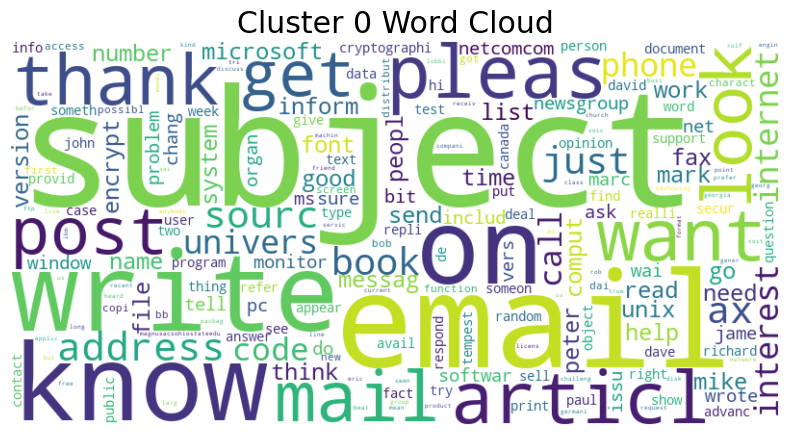

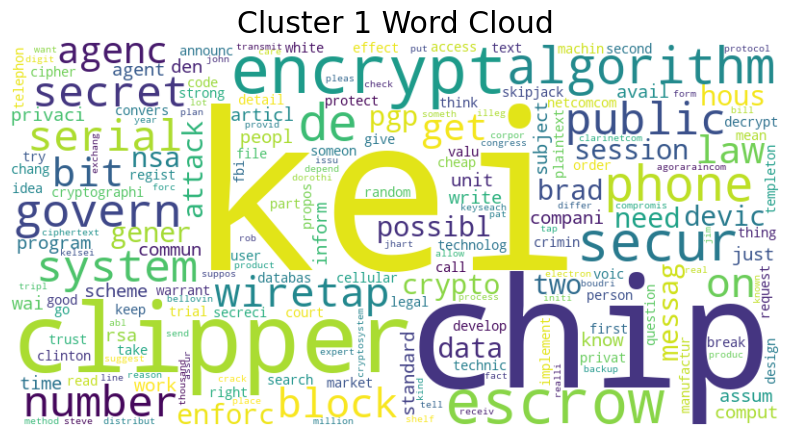

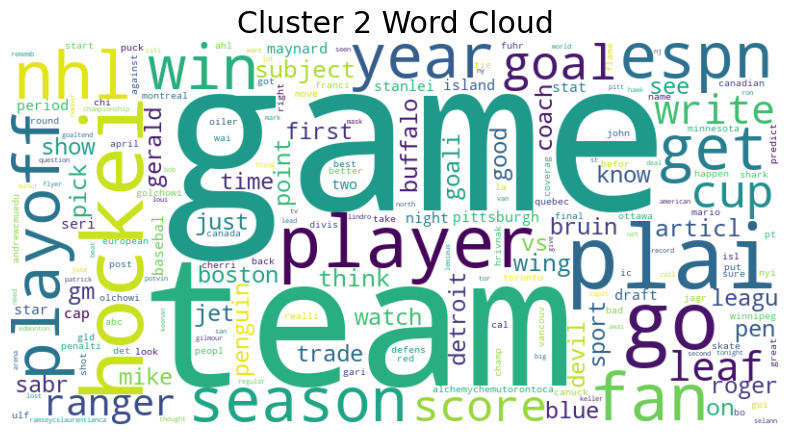

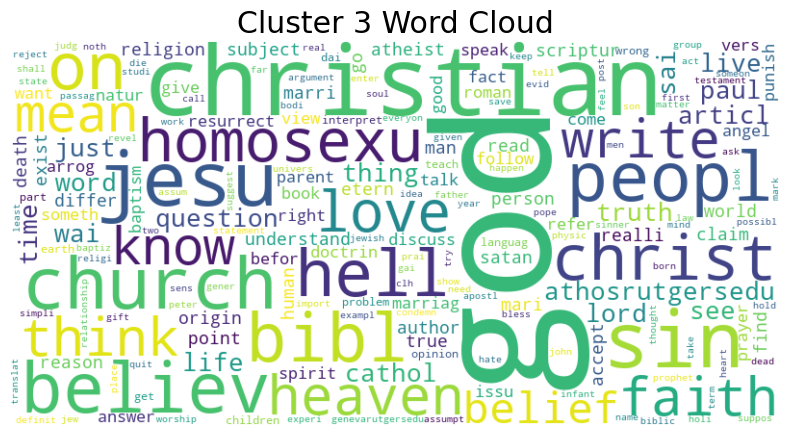

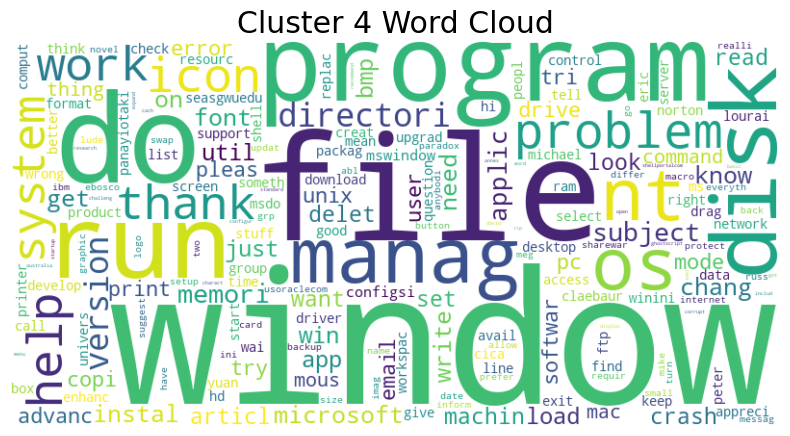

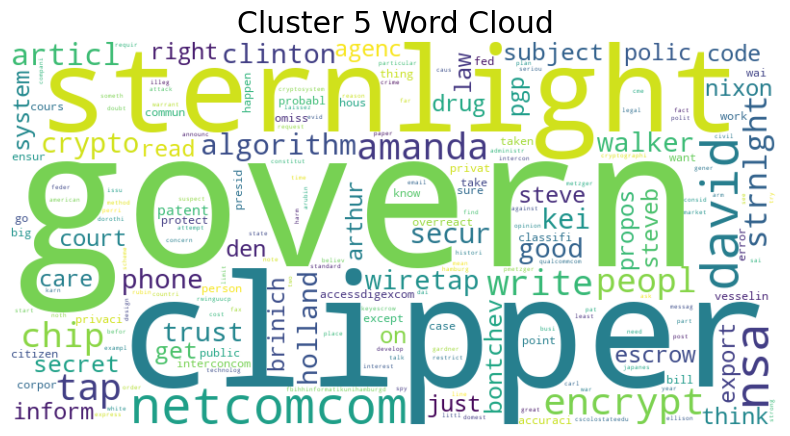

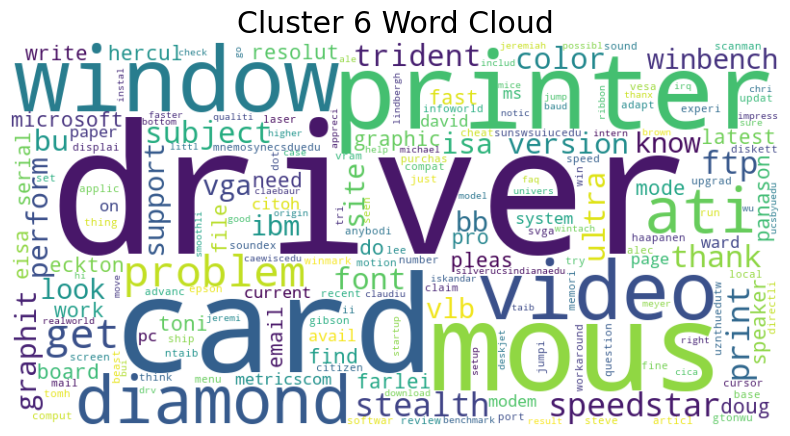

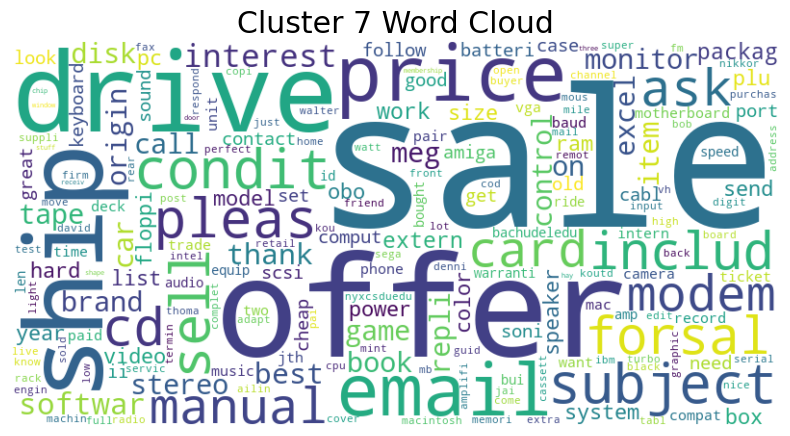

In [47]:
create_word_clouds(data_terms.flatten(), kmeans.cluster_centers_, 8)

PART D: [5 pts] Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.

In [48]:
# Assuming 'X' is your full dataset and 'y' is the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Perform K-means clustering on X_train
kmeans = KMeans(n_clusters=5, random_state=99, n_init=10)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# Calculate Completeness and Homogeneity scores
completeness = completeness_score(y_train, cluster_labels)
homogeneity = homogeneity_score(y_train, cluster_labels)

print("Completeness Score:", completeness)
print("Homogeneity Score:", homogeneity)

Completeness Score: 0.21051589375295532
Homogeneity Score: 0.08000210191249067


[Extra Credit - 5 pts: Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.]

In [49]:
# Assuming 'X' is your full dataset and 'y' is the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Range of k values to try
k_values = range(4, 9)

# Store the results
results = []

# Perform clustering for each value of k and compute scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=99, n_init=10)
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_
    completeness = completeness_score(y_train, cluster_labels)
    homogeneity = homogeneity_score(y_train, cluster_labels)
    results.append((k, completeness, homogeneity))

# Print the results
print("k, Completeness, Homogeneity")
for k, completeness, homogeneity in results:
    print(f"{k}, {completeness:.4f}, {homogeneity:.4f}")

# Brief report
best_result = max(results, key=lambda x: (x[1] + x[2]))
print(f"\nThe best clustering representation of the original newsgroup categories is achieved with k = {best_result[0]},")
print(f"where Completeness = {best_result[1]:.4f} and Homogeneity = {best_result[2]:.4f}.")
print("\nThis indicates that this particular clustering provides a good balance between having all members of a class in the same cluster (completeness) and having each cluster contain only members of a single class (homogeneity).")

k, Completeness, Homogeneity
4, 0.2137, 0.0688
5, 0.2105, 0.0800
6, 0.2286, 0.0956
7, 0.2349, 0.1054
8, 0.2475, 0.1202

The best clustering representation of the original newsgroup categories is achieved with k = 8,
where Completeness = 0.2475 and Homogeneity = 0.1202.

This indicates that this particular clustering provides a good balance between having all members of a class in the same cluster (completeness) and having each cluster contain only members of a single class (homogeneity).


PART E:[10 pts] Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [51]:
# Calculate the cosine similarity between test documents and cluster centroids
cosine_similarities = cosine_similarity(X_test_tfidf, kmeans.cluster_centers_)

# Assign each document to the cluster with the highest similarity
assigned_clusters = np.argmax(cosine_similarities, axis=1)

# Create a DataFrame to display the results
results_df = pd.DataFrame(cosine_similarities, columns=[f'document cosine similarity to cluster: {i}' for i in range(kmeans.n_clusters)])
results_df['cluster prediction'] = assigned_clusters

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

results_df

document cosine similarity to cluster: 0  \
0                                     0.000000   
1                                     0.000000   
2                                     0.001628   
3                                     0.000000   
4                                     0.028939   
5                                     0.005062   
6                                     0.000302   
7                                     0.001497   
8                                     0.171159   
9                                     0.000141   
10                                    0.002916   
11                                    0.000350   
12                                    0.001015   
13                                    0.002515   
14                                    0.003718   
15                                    0.000979   
16                                    0.000503   
17                                    0.192541   
18                                    0.000000   
19                                    0.000159   
20                                    0.002567   
21                                    0.000000   
22                                    0.000000   
23                                    0.002504   
24                                    0.000097   
25                                    0.052511   
26                                    0.002182   
27                                    0.002993   
28                                    0.000092   
29                                    0.000388   
30                                    0.000797   
31                                    0.001771   
32                                    0.000000   
33                                    0.000881   
34                                    0.000180   
35                                    0.703964   
36                                    0.000452   
37                                    0.001161   
38                                    0.003953   
39                                    0.000570   
40                                    0.000489   
41                                    0.134708   
42                                    0.000879   
43                                    0.294046   
44                                    0.001275   
45                                    0.000134   
46                                    0.000000   
47                                    0.000321   
48                                    0.000514   
49                                    0.000235   
50                                    0.000503   
51                                    0.000529   
52                                    0.011807   
53                                    0.000753   
54                                    0.000000   
55                                    0.003633   
56                                    0.000623   
57                                    0.001625   
58                                    0.000427   
59                                    0.001125   
60                                    0.000000   
61                                    0.000101   
62                                    0.000000   
63                                    0.000000   
64                                    0.001123   
65                                    0.674781   
66                                    0.001537   
67                                    0.000519   
68                                    0.000107   
69                                    0.000243   
70                                    0.001634   
71                                    0.000000   
72                                    0.000000   
73                                    0.000113   
74                                    0.000000   
75                                    0.001647   
76                                    0.000242   
77                                    0.000000   
78                                    0.001531   
79    